## Laptop Price Predictor - Deployed on Heroku


## Data Preprocessing

In [ ]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# load dataset
data = pd.read_csv("laptop_data.csv")
data.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [ ]:
data.columns

Index(['Unnamed: 0', 'Company', 'TypeName', 'Inches', 'ScreenResolution',
       'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

In [ ]:
# removed the unnamed columns
data = data[["Company", "TypeName", "Inches", "ScreenResolution", "Cpu", "Ram",
              "Memory", "Gpu", "OpSys", "Weight", "Price"]]
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [ ]:
data.isnull().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [ ]:
data.duplicated().sum()

29

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
dtypes: float64(2), object(9)
memory usage: 112.1+ KB


In [ ]:
# separate the categorical and numerical features
cat_vars = data.select_dtypes(include=["object"]).columns
num_vars = data.select_dtypes(include=["int32", "int64", "float32", "float64"]).columns

cat_vars, num_vars

(Index(['Company', 'TypeName', 'ScreenResolution', 'Cpu', 'Ram', 'Memory',
        'Gpu', 'OpSys', 'Weight'],
       dtype='object'), Index(['Inches', 'Price'], dtype='object'))

In [ ]:
def uniquevals(col):
  print(f" The detail of this col: {col} is : {data[col].unique()}")

def valuecounts(col):
  print(f"The detail of this col: {col} is: {data[col].value_counts()}")

for col in data.columns:
  uniquevals(col)
  print("-"*75)

 The detail of this col: Company is : ['Apple' 'HP' 'Acer' 'Asus' 'Dell' 'Lenovo' 'Chuwi' 'MSI' 'Microsoft'
 'Toshiba' 'Huawei' 'Xiaomi' 'Vero' 'Razer' 'Mediacom' 'Samsung' 'Google'
 'Fujitsu' 'LG']
---------------------------------------------------------------------------
 The detail of this col: TypeName is : ['Ultrabook' 'Notebook' 'Netbook' 'Gaming' '2 in 1 Convertible'
 'Workstation']
---------------------------------------------------------------------------
 The detail of this col: Inches is : [13.3 15.6 15.4 14.  12.  11.6 17.3 10.1 13.5 12.5 13.  18.4 13.9 12.3
 17.  15.  14.1 11.3]
---------------------------------------------------------------------------
 The detail of this col: ScreenResolution is : ['IPS Panel Retina Display 2560x1600' '1440x900' 'Full HD 1920x1080'
 'IPS Panel Retina Display 2880x1800' '1366x768'
 'IPS Panel Full HD 1920x1080' 'IPS Panel Retina Display 2304x1440'
 'IPS Panel Full HD / Touchscreen 1920x1080'
 'Full HD / Touchscreen 1920x1080' 'Touchscree

If I remove the "GB" from RAM I can make it an integer value, and the same can be applied to the memory & weight.  I can classify weight as a floating int for example. 

In [ ]:
data["Ram"] = data["Ram"].str.replace("GB","")
data["Weight"] = data["Weight"].str.replace("kg","")

# convert from string to int
data["Ram"] = data["Ram"].astype("int32")

# convert from string to float
data["Weight"] = data["Weight"].astype("float32")

data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 101.9+ KB


## EDA

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


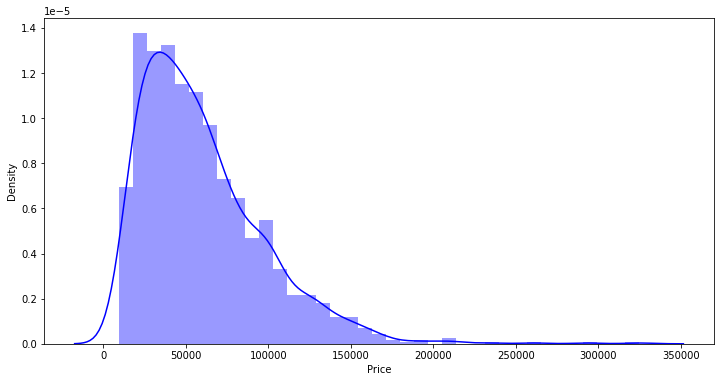

In [ ]:
plt.figure(figsize=(12,6))
sns.distplot(data["Price"], color="blue")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

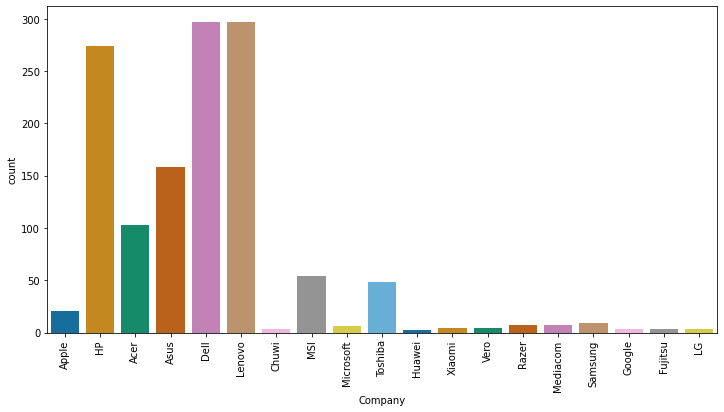

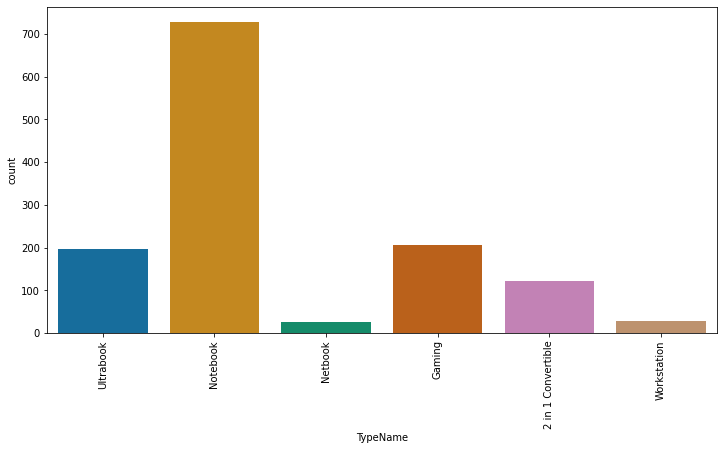

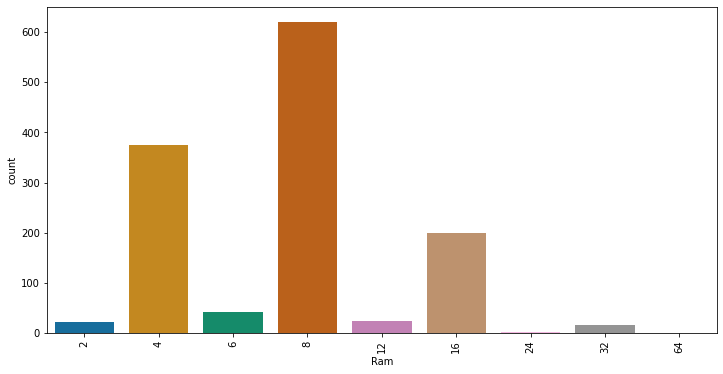

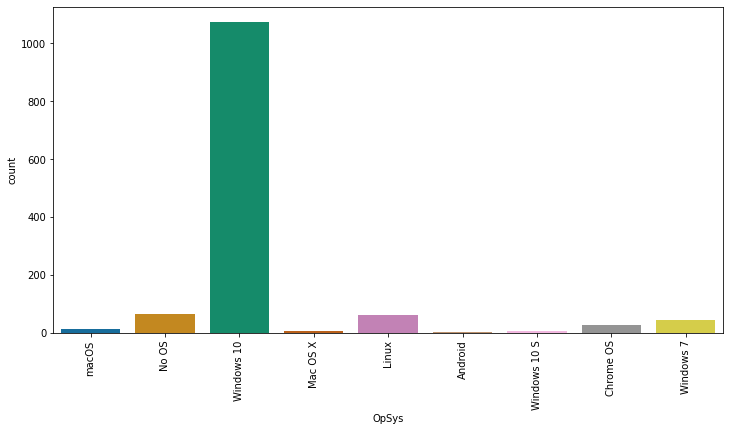

In [ ]:
# plot countplots for the caategorical data

def drawplot(col):
  plt.figure(figsize=(12,6))
  sns.countplot(data[col], palette = "colorblind")
  plt.xticks(rotation="vertical")

view = ["Company", "TypeName", "Ram", "OpSys"]
for col in view:
  drawplot(col)

<function matplotlib.pyplot.show>

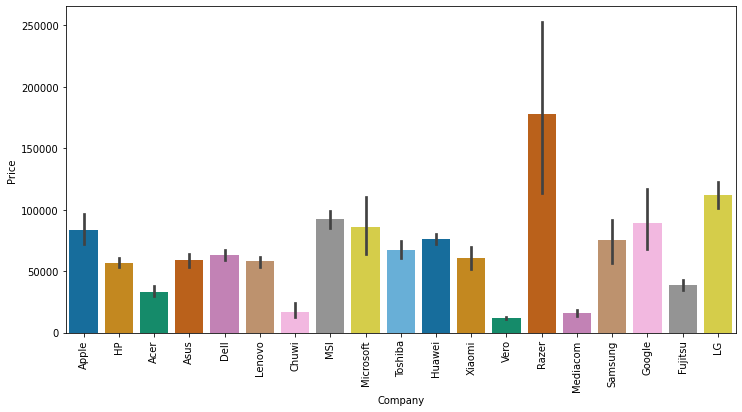

In [ ]:
# check the average latop price for each of the brands
# prices are in rupee as it is a dataset originating from inda.  

plt.figure(figsize=(12,6))
sns.barplot(x = data["Company"], y = data["Price"], palette = "colorblind")
plt.xticks(rotation = "vertical")
plt.show

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

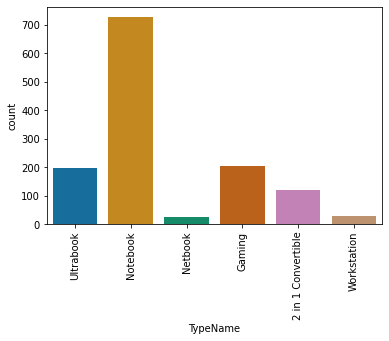

In [ ]:
# check the types of laptops
sns.countplot(data["TypeName"], palette="colorblind")
plt.xticks(rotation = "vertical")

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

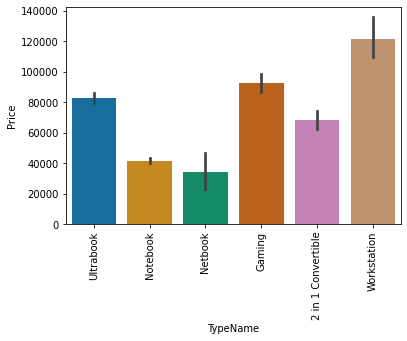

In [ ]:
# laptop type price variation
sns.barplot(x = data["TypeName"], y = data["Price"], palette="colorblind")
plt.xticks(rotation = "vertical")

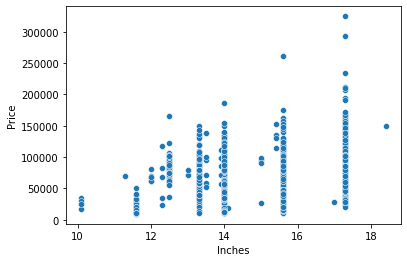

In [ ]:
# does size matter?  comparing inches to price

sns.scatterplot(x = data["Inches"], y = data["Price"])

In [ ]:
# screen resolution counts
data["ScreenResolution"].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

In [ ]:
# create a new column for the touch screens
data["TouchScreen"] = data["ScreenResolution"].apply(lambda element:1 
                                                     if "Touchscreen" in element else 0)

data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


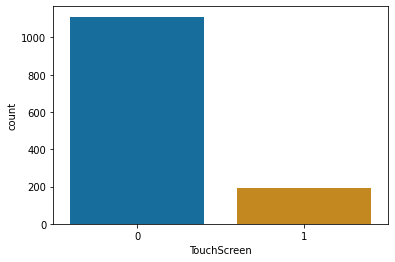

In [ ]:
# count the amount of touchscreen laptops
sns.countplot(data["TouchScreen"], palette = "colorblind")

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

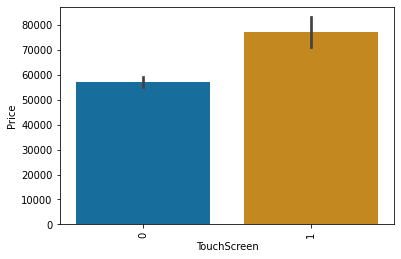

In [ ]:
# touchscreen comparison to price
sns.barplot(x = data["TouchScreen"], y = data["Price"], palette="colorblind")
plt.xticks(rotation = "vertical")

In [ ]:
# create a new column for the IPS
data["IPS"] = data["ScreenResolution"].apply(lambda element:1 
                                             if "IPS" in element else 0)

data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


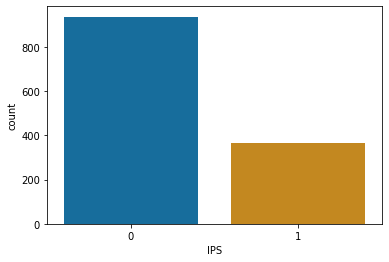

In [ ]:
# count the amount of IPS
sns.countplot(data["IPS"], palette = "colorblind")

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

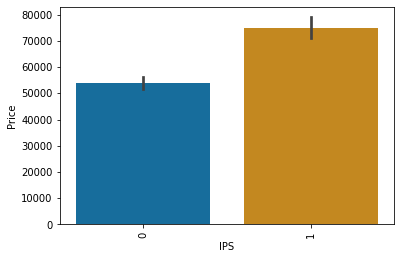

In [ ]:
# price variation for the IPS element
sns.barplot(x = data["IPS"], y = data["Price"], palette="colorblind")
plt.xticks(rotation = "vertical")

In [ ]:
# extracting and spliting text at the X 
split_data = data["ScreenResolution"].str.split("x", n = 1, expand = True)
split_data.head()

,0,1
0,IPS Panel Retina Display 2560,1600
1,1440,900
2,Full HD 1920,1080
3,IPS Panel Retina Display 2880,1800
4,IPS Panel Retina Display 2560,1600


In [ ]:
split_data = data["ScreenResolution"].str.split("x", n = 1, expand = True)

data["x_res"] = split_data[0]
data["y_res"] = split_data[1]

data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,x_res,y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,Full HD 1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,IPS Panel Retina Display 2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,IPS Panel Retina Display 2560,1600


In [ ]:
# convert these numbers into "regular expressions"
data["x_res"] = data["x_res"].str.replace(",","").str.findall(r"(\d+\.?\d+)").apply(lambda x:x[0])
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,x_res,y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


In [ ]:
data["x_res"] = data["x_res"].astype("int")
data["y_res"] = data["y_res"].astype("int")

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  TouchScreen       1303 non-null   int64  
 12  IPS               1303 non-null   int64  
 13  x_res             1303 non-null   int64  
 14  y_res             1303 non-null   int64  
dtypes: float32(1), float64(2), int32(1), int64(4), object(7)
memory usage: 142.6+ KB


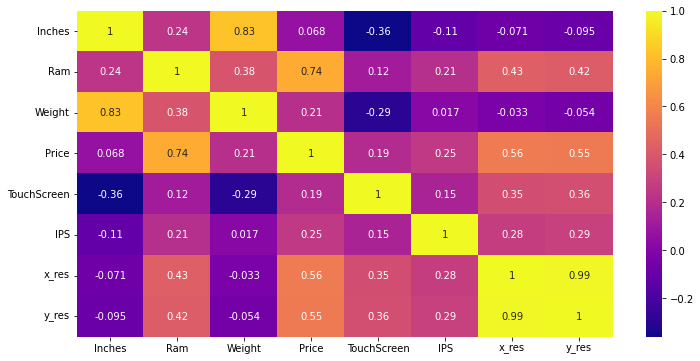

In [ ]:
# heatmap to identify correlations 
plt.figure(figsize=(12,6))
sns.heatmap(data.corr(), annot = True, cmap="plasma")

In [ ]:
data.corr()["Price"]

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
TouchScreen    0.191226
IPS            0.252208
x_res          0.556529
y_res          0.552809
Name: Price, dtype: float64

From the correlation plot it can be observed that as x_res and y_res is increasing,  the price of the laptop is also increasing - they are positively correlated.  It is possible to add a new feature based on this obvservation which is a pixel per inch

The below is the calculation of this PPI.

In [ ]:
data["PPI"] = (((data["x_res"]**2+data["y_res"]**2))**0.5/data["Inches"]).astype("float")

data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,x_res,y_res,PPI
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534624
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983005


In [ ]:
data.corr()["Price"]

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
TouchScreen    0.191226
IPS            0.252208
x_res          0.556529
y_res          0.552809
PPI            0.473487
Name: Price, dtype: float64

Since we have combined SR, Inches and the X & Y res into a more powerful single feature,  we can drop them. 

In [ ]:
data.drop(columns=["ScreenResolution", "Inches", "x_res", "y_res"], inplace=True)

data.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005


In [ ]:
data["Cpu"].value_counts()

Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: Cpu, Length: 118, dtype: int64

In [ ]:
# grouping the CPUS by their "version": i5, i7 etc. 
data["CPU_Name"] = data["Cpu"].apply(lambda text:" ".join(text.split()[:3]))

data.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_Name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


In [ ]:
# define a function to identify other processors and intel variants

def protype(text):
  if text == "Intel Core i7" or text == "Intel Core i5" or text == "Intel Core i3":
    return text
  
  else: 
    if text.split()[0] == "Intel":
      return "Other Intel Proc."
    else:
      return "AMD Processor"

data["CPU_Name"] = data["CPU_Name"].apply(lambda text:protype(text))

data.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_Name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


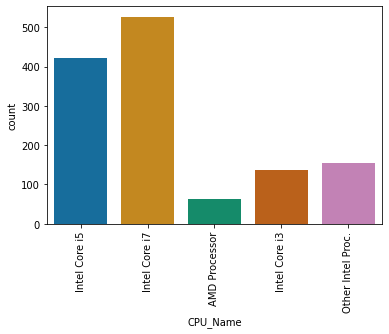

In [ ]:
sns.countplot(data["CPU_Name"], palette="colorblind")
plt.xticks(rotation = "vertical")
plt.show()

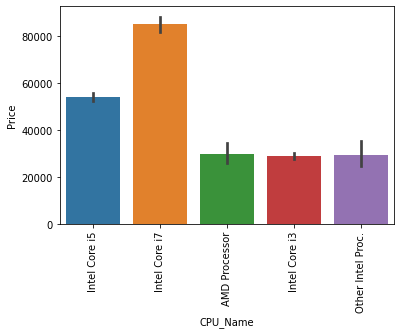

In [ ]:
# observe the price variation
sns.barplot(x = data["CPU_Name"], y = data["Price"])
plt.xticks(rotation = "vertical")
plt.show()

In [ ]:
data.drop(columns=["Cpu"], inplace=True)
data.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_Name
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


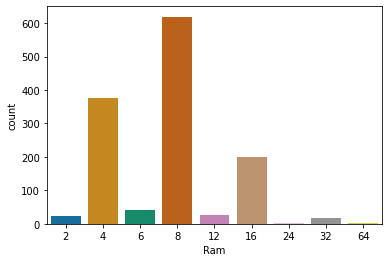

In [ ]:
sns.countplot(data["Ram"], palette = "colorblind")
plt.show()

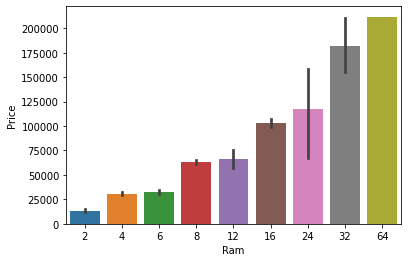

In [ ]:
sns.barplot(x = data["Ram"], y = data["Price"])

In [ ]:
data["Memory"].iloc[:1][0]

'128GB SSD'

In [ ]:
data["Memory"].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [ ]:
data["Memory"] = data["Memory"].astype(str).replace("\.0", "", regex = True)
data["Memory"] = data["Memory"].str.replace("GB", "")
data["Memory"] = data["Memory"].str.replace("TB", "000")

new_data = data["Memory"].str.split("+", n = 1, expand = True)

new_data

,0,1
0,128 SSD,None
1,128 Flash Storage,None
2,256 SSD,None
3,512 SSD,None
4,256 SSD,None
...,...,...
1298,128 SSD,None
1299,512 SSD,None
1300,64 Flash Storage,None
1301,1000 HDD,None


In [ ]:
# now to strip the white space

data["first"] = new_data[0]
data["first"] = data["first"].str.strip()
data.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_Name,first
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,128 SSD
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,128 Flash Storage
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,256 SSD
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,512 SSD
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,256 SSD


In [ ]:
# apply the changes

def applychanges(value):
  data["Layer1"+value] = data["first"].apply(lambda x:1 if value in x else 0)

listapply = ["HDD", "SSD", "Hybrid", "FlashStorage"]
for value in listapply:
  applychanges(value)

data.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_Name,first,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1FlashStorage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,128 SSD,0,1,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,128 Flash Storage,0,0,0,0
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,256 SSD,0,1,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,512 SSD,0,1,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,256 SSD,0,1,0,0


In [ ]:
# remove all the charatcers just keep numbers
data["first"] = data["first"].str.replace(r"\D","")
data["first"].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


256     508
1000    250
128     177
512     140
500     132
32       45
64       17
2000     16
16       10
180       5
240       1
8         1
508       1
Name: first, dtype: int64

In [ ]:
data["second"] = new_data[1]
data.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_Name,first,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1FlashStorage,second
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,128,0,1,0,0,None
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,128,0,0,0,0,None
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,256,0,1,0,0,None
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,512,0,1,0,0,None
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,256,0,1,0,0,None


In [ ]:
# apply the changes

def applychanges1(value):
  data["Layer2"+value] = data["second"].apply(lambda x:1 if value in x else 0)

listapply1 = ["HDD", "SSD", "Hybrid", "FlashStorage"]
data["second"] = data["second"].fillna("0")
for value in listapply1:
  applychanges1(value)

data["second"] = data["second"].str.replace(r"\D","")
data["second"].value_counts()

data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: The default value of regex will change from True to False in a future version.
  # This is added back by InteractiveShellApp.init_path()


,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,...,first,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1FlashStorage,second,Layer2HDD,Layer2SSD,Layer2Hybrid,Layer2FlashStorage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,...,128,0,1,0,0,0,0,0,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,...,128,0,0,0,0,0,0,0,0,0
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,...,256,0,1,0,0,0,0,0,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,...,512,0,1,0,0,0,0,0,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,...,256,0,1,0,0,0,0,0,0,0


In [ ]:
# convert to int
data["second"] = data["second"].astype("int")
data["first"] = data["first"].astype("int")
data.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,...,first,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1FlashStorage,second,Layer2HDD,Layer2SSD,Layer2Hybrid,Layer2FlashStorage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,...,128,0,1,0,0,0,0,0,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,...,128,0,0,0,0,0,0,0,0,0
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,...,256,0,1,0,0,0,0,0,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,...,512,0,1,0,0,0,0,0,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,...,256,0,1,0,0,0,0,0,0,0


In [ ]:
# multiplying the elements and storing the result in subsequent columns
data["HDD"] = (data["first"]*data["Layer1HDD"]+data["second"]*data["Layer2HDD"])
data["SSD"] = (data["first"]*data["Layer1SSD"]+data["second"]*data["Layer2SSD"])
data["Hybrid"] = (data["first"]*data["Layer1Hybrid"]+data["second"]*data["Layer2Hybrid"])
data["FlashStorage"] = (data["first"]*data["Layer1FlashStorage"]+data["second"]*data["Layer2FlashStorage"])

#drop uncessary columns

data.drop(columns=["first", "second", "Layer1HDD", "Layer1SSD", "Layer1Hybrid", "Layer1FlashStorage"], inplace=True)
data.drop(columns=["Layer2HDD", "Layer2SSD", "Layer2Hybrid", "Layer2FlashStorage"], inplace=True)

In [ ]:
data.sample(5)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_Name,HDD,SSD,Hybrid,FlashStorage
447,Dell,Workstation,8,64 Flash Storage + 1000 HDD,Nvidia Quadro M620,Windows 10,2.23,106187.04,0,0,141.211998,Other Intel Proc.,1000,0,0,0
234,Acer,2 in 1 Convertible,8,256 SSD,Intel HD Graphics 520,Windows 10,1.60,36709.92,1,1,165.632118,Intel Core i5,0,256,0,0
82,HP,Notebook,8,256 SSD,Intel HD Graphics 620,Windows 10,1.63,45820.80,0,0,157.350512,Intel Core i5,0,256,0,0
58,MSI,Gaming,16,256 SSD + 2000 HDD,Nvidia GeForce GTX 1070,Windows 10,2.43,130482.72,0,0,127.335675,Intel Core i7,2000,256,0,0
798,Lenovo,2 in 1 Convertible,8,256 SSD,Intel HD Graphics 620,Windows 10,1.38,71874.72,1,1,158.482530,Intel Core i7,0,256,0,0


In [ ]:
data.drop(columns=["Memory"], inplace = True)
data.sample(5)

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_Name,HDD,SSD,Hybrid,FlashStorage
1014,HP,Notebook,4,Intel HD Graphics 620,Windows 10,1.49,42624.00,0,0,117.826530,Intel Core i3,500,0,0,0
373,Lenovo,Notebook,4,AMD Radeon R5,Windows 10,2.60,26053.92,0,0,106.113062,AMD Processor,0,128,0,0
1118,Toshiba,Ultrabook,16,Intel HD Graphics 620,Windows 10,1.05,118601.28,0,0,165.632118,Intel Core i7,0,512,0,0
165,MSI,Gaming,16,Nvidia GeForce GTX 1060,Windows 10,2.40,95850.72,0,1,141.211998,Intel Core i7,1000,256,0,0
72,Dell,Notebook,8,AMD Radeon 530,Windows 10,2.20,46353.60,0,0,141.211998,Intel Core i7,0,256,0,0


In [ ]:
data.corr()["Price"]

Ram             0.743007
Weight          0.210370
Price           1.000000
TouchScreen     0.191226
IPS             0.252208
PPI             0.473487
HDD            -0.096441
SSD             0.670799
Hybrid          0.007989
FlashStorage         NaN
Name: Price, dtype: float64

In [ ]:
data.columns

Index(['Company', 'TypeName', 'Ram', 'Gpu', 'OpSys', 'Weight', 'Price',
       'TouchScreen', 'IPS', 'PPI', 'CPU_Name', 'HDD', 'SSD', 'Hybrid',
       'FlashStorage'],
      dtype='object')

In [ ]:
# drop HDD & FlashStorage as they provide no benefit

data.drop(columns=["Hybrid", "FlashStorage"], inplace=True)

data.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_Name,HDD,SSD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256


In [ ]:
data["Gpu"].value_counts()

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: Gpu, Length: 110, dtype: int64

In [ ]:
# extracting the GPU brands

a = data["Gpu"].iloc[1]
print(a.split()[0])

Intel


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


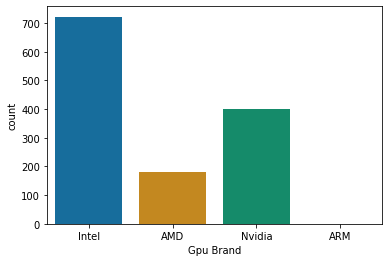

In [ ]:
data["Gpu Brand"] = data["Gpu"].apply(lambda x:x.split()[0])

sns.countplot(data["Gpu Brand"], palette = "colorblind")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


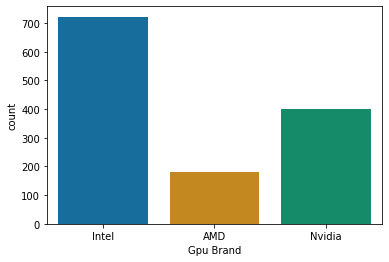

In [ ]:
data = data[data["Gpu Brand"]!="ARM"]
sns.countplot(data["Gpu Brand"], palette = "colorblind")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


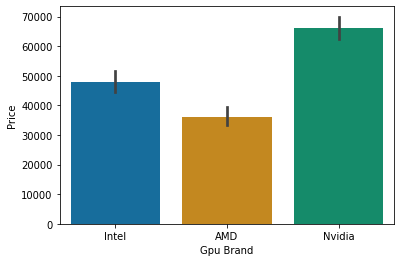

In [ ]:
# price-GPU copmparison
sns.barplot(data["Gpu Brand"], data["Price"], palette = "colorblind", estimator = np.median)

In [ ]:
data = data.drop(columns=["Gpu"])
data.head()

,Company,TypeName,Ram,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_Name,HDD,SSD,Gpu Brand
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel


In [ ]:
data["OpSys"].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


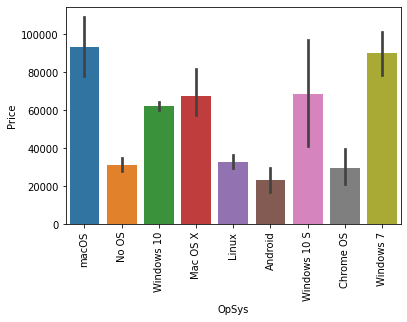

In [ ]:
sns.barplot(data["OpSys"], data["Price"])
plt.xticks(rotation = "vertical")
plt.show()

In [ ]:
data["OpSys"].unique()

array(['macOS', 'No OS', 'Windows 10', 'Mac OS X', 'Linux', 'Android',
       'Windows 10 S', 'Chrome OS', 'Windows 7'], dtype=object)

In [ ]:

def setOS(text):
  if text == "Windows 10" or text == "Windows 7" or text == "Windows 10 S":
    return "Windows"
  
  elif text == "Mac OS X" or text == "macOS":
    return "Mac"
  
  else:
    return "Other"

data["OpSys"] = data["OpSys"].apply(lambda x: setOS(x))

data.head()

,Company,TypeName,Ram,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_Name,HDD,SSD,Gpu Brand
0,Apple,Ultrabook,8,Mac,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Mac,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Other,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,Mac,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Mac,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


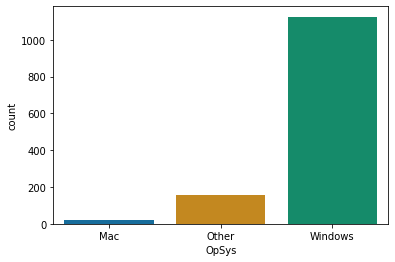

In [ ]:
sns.countplot(data["OpSys"], palette = "colorblind")

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

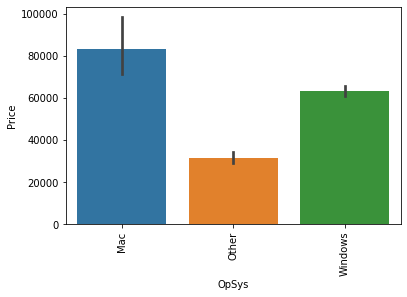

In [ ]:
sns.barplot(x = data["OpSys"], y = data["Price"])
plt.xticks(rotation = "vertical")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


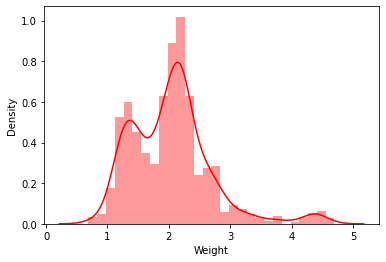

In [ ]:
# check the weighting

sns.distplot(data["Weight"], color="red")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


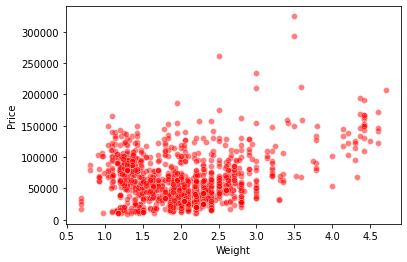

In [ ]:
sns.scatterplot(data["Weight"], data["Price"], alpha=0.5, color="red")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


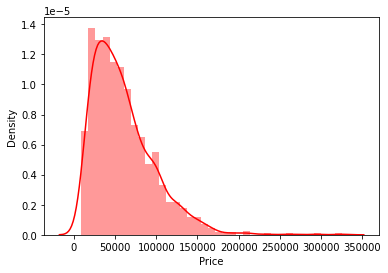

In [ ]:

sns.distplot(data["Price"], color="red")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


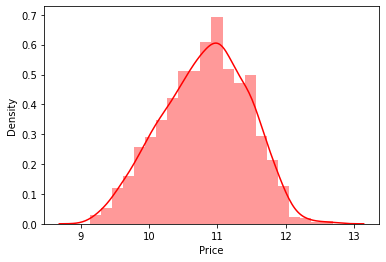

In [ ]:
sns.distplot(np.log(data["Price"]), color="red")

In [ ]:
data.corr()["Price"]

Ram            0.742905
Weight         0.209867
Price          1.000000
TouchScreen    0.192917
IPS            0.253320
PPI            0.475368
HDD           -0.096891
SSD            0.670660
Name: Price, dtype: float64

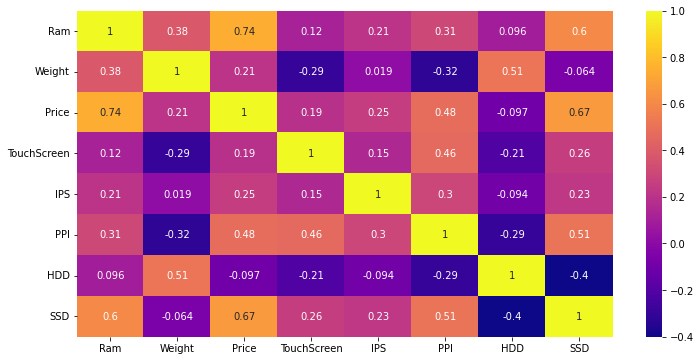

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(data.corr(), annot=True, cmap="plasma")

## Build the Model

In [ ]:
# split some data into test and train
train = data.drop(["Price"],axis=1)
test = np.log(data["Price"])

In [ ]:
# import the libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn import tree

In [ ]:
# test and train
x_train, x_test, y_train, y_test = train_test_split(train, test, test_size = 0.15, random_state = 42)

x_train.shape, x_test.shape

((1106, 12), (196, 12))

The Column Transformer will be used a lot while building the model through Pipelines Therefore I must get the index numbers of the columns which have categorical values. 

In [ ]:
mapper = {i:value for i,value in enumerate(x_train.columns)}
mapper

{0: 'Company',
 1: 'TypeName',
 2: 'Ram',
 3: 'OpSys',
 4: 'Weight',
 5: 'TouchScreen',
 6: 'IPS',
 7: 'PPI',
 8: 'CPU_Name',
 9: 'HDD',
 10: 'SSD',
 11: 'Gpu Brand'}

## Linear Regression

In [ ]:
# apply one hot encoding on the columns with indices: 0, 1, 3, 8, 11
# the remainder will be kept as a passthrough ie. no other col must be affected

step1 = ColumnTransformer(transformers = [("col_tnf", OneHotEncoder(sparse=False, drop = "first"), 
                                           [0,1,3,8,11])], remainder ="passthrough")

step2 = LinearRegression()

pipe = Pipeline([("step1", step1), ("step2", step2)])

pipe.fit(x_train, y_train)

y_pred = pipe.predict(x_test)

print("R2 Score: ", metrics.r2_score(y_test, y_pred))
print("MAE: ", metrics.mean_absolute_error(y_test, y_pred))

R2 Score:  0.7925383261797377
MAE:  0.2137307672356467


In [ ]:
# MAE is 0.21,  I can check how much difference there is to the original value

# there is a difference of 1.23.  the model predicts +-0.21 than the original price
np.exp(0.21)

1.2336780599567432

## Ridge Regression

In [ ]:
step1 = ColumnTransformer(transformers = [("col_tnf", OneHotEncoder(sparse=False, drop = "first"), 
                                           [0,1,3,8,11])], remainder ="passthrough")

step2 = Ridge(alpha=10)

pipe = Pipeline([("step1", step1), ("step2", step2)])

pipe.fit(x_train, y_train)

y_pred = pipe.predict(x_test)

print("R2 Score: ", metrics.r2_score(y_test, y_pred))
print("MAE: ", metrics.mean_absolute_error(y_test, y_pred))

R2 Score:  0.7835783695325947
MAE:  0.22051894053664953


## LassoRegression

In [ ]:
step1 = ColumnTransformer(transformers = [("col_tnf", OneHotEncoder(sparse=False, drop = "first"), 
                                           [0,1,3,8,11])], remainder ="passthrough")

step2 = Lasso(alpha=0.001)

pipe = Pipeline([("step1", step1), ("step2", step2)])

pipe.fit(x_train, y_train)

y_pred = pipe.predict(x_test)

print("R2 Score: ", metrics.r2_score(y_test, y_pred))
print("MAE: ", metrics.mean_absolute_error(y_test, y_pred))

R2 Score:  0.7871774842409249
MAE:  0.21833148799326466


## Decision Tree

In [ ]:
step1 = ColumnTransformer(transformers = [("col_tnf", OneHotEncoder(sparse=False, drop = "first"), 
                                           [0,1,3,8,11])], remainder ="passthrough")

step2 = DecisionTreeRegressor(max_depth = 10)

pipe = Pipeline([("step1", step1), ("step2", step2)])

pipe.fit(x_train, y_train)

y_pred = pipe.predict(x_test)

print("R2 Score: ", metrics.r2_score(y_test, y_pred))
print("MAE: ", metrics.mean_absolute_error(y_test, y_pred))

R2 Score:  0.8228092310559367
MAE:  0.19015679819524167


## Random Forest

In [ ]:
step1 = ColumnTransformer(transformers = [("col_tnf", OneHotEncoder(sparse=False, drop = "first"), 
                                           [0,1,3,8,11])], remainder ="passthrough")

step2 = RandomForestRegressor(n_estimators=100, 
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([("step1", step1), ("step2", step2)])

pipe.fit(x_train, y_train)

y_pred = pipe.predict(x_test)

print("R2 Score: ", metrics.r2_score(y_test, y_pred))
print("MAE: ", metrics.mean_absolute_error(y_test, y_pred))

R2 Score:  0.8513077041949594
MAE:  0.17273466722359118


In [ ]:
import pickle

pickle_dump = (data, open("data.pkl", "wb"))
pickle.dump(pipe, open("pipe.pkl", "wb"))

In [ ]:
train.head()

,Company,TypeName,Ram,OpSys,Weight,TouchScreen,IPS,PPI,CPU_Name,HDD,SSD,Gpu Brand
0,Apple,Ultrabook,8,Mac,1.37,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Mac,1.34,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Other,1.86,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,Mac,1.83,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Mac,1.37,0,1,226.983005,Intel Core i5,0,256,Intel


In [ ]:
train.to_csv("traindata.csv", index=None)

## Hyperparameter Tuning for Model Selection

In [ ]:
indexl = [0,1,3,8,11]
transformlist = []
for key, value in mapper.items():
  if key in indexl:
    transformlist.append(value)

transformlist

['Company', 'TypeName', 'OpSys', 'CPU_Name', 'Gpu Brand']

In [ ]:
train = pd.get_dummies(train, columns = transformlist, drop_first=True)
train.head()

,Ram,Weight,TouchScreen,IPS,PPI,HDD,SSD,Company_Apple,Company_Asus,Company_Chuwi,...,TypeName_Ultrabook,TypeName_Workstation,OpSys_Other,OpSys_Windows,CPU_Name_Intel Core i3,CPU_Name_Intel Core i5,CPU_Name_Intel Core i7,CPU_Name_Other Intel Proc.,Gpu Brand_Intel,Gpu Brand_Nvidia
0,8,1.37,0,1,226.983005,0,128,1,0,0,...,1,0,0,0,0,1,0,0,1,0
1,8,1.34,0,0,127.677940,0,0,1,0,0,...,1,0,0,0,0,1,0,0,1,0
2,8,1.86,0,0,141.211998,0,256,0,0,0,...,0,0,1,0,0,1,0,0,1,0
3,16,1.83,0,1,220.534624,0,512,1,0,0,...,1,0,0,0,0,0,1,0,0,0
4,8,1.37,0,1,226.983005,0,256,1,0,0,...,1,0,0,0,0,1,0,0,1,0


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(train, test, test_size = 0.15, random_state = 42)

x_train.shape, x_test.shape

((1106, 38), (196, 38))

[Text(0.4895157788539546, 0.9791666666666666, 'Ram <= 7.0\nsquared_error = 0.393\nsamples = 1106\nvalue = 10.822'),
 Text(0.22750118932338062, 0.9375, 'CPU_Name_Other Intel Proc. <= 0.5\nsquared_error = 0.193\nsamples = 373\nvalue = 10.201'),
 Text(0.14008644902090225, 0.8958333333333334, 'CPU_Name_Intel Core i5 <= 0.5\nsquared_error = 0.127\nsamples = 261\nvalue = 10.381'),
 Text(0.08831179709372614, 0.8541666666666666, 'CPU_Name_Intel Core i7 <= 0.5\nsquared_error = 0.078\nsamples = 156\nvalue = 10.236'),
 Text(0.029257852268388902, 0.8125, 'Weight <= 1.645\nsquared_error = 0.066\nsamples = 136\nvalue = 10.183'),
 Text(0.00814456604734029, 0.7708333333333334, 'TypeName_Ultrabook <= 0.5\nsquared_error = 0.058\nsamples = 11\nvalue = 10.586'),
 Text(0.006108424535505218, 0.7291666666666666, 'Company_Asus <= 0.5\nsquared_error = 0.019\nsamples = 9\nvalue = 10.489'),
 Text(0.0050903537795876815, 0.6875, 'Weight <= 1.495\nsquared_error = 0.01\nsamples = 8\nvalue = 10.524'),
 Text(0.0030542

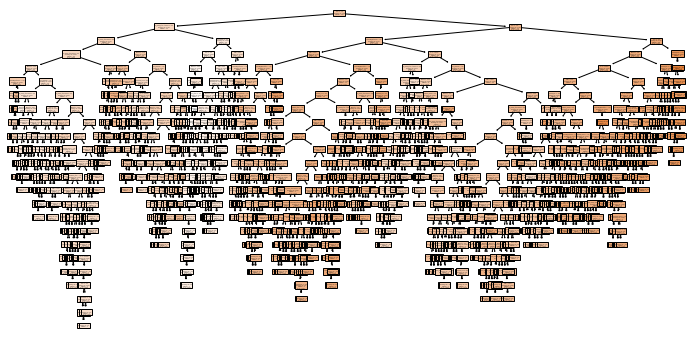

In [ ]:
reg = DecisionTreeRegressor(random_state = 42)
reg.fit(x_train, y_train)
plt.figure(figsize=(12,6))
tree.plot_tree(reg, filled=True, feature_names = train.columns)

In [ ]:
path = reg.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas = path.ccp_alphas

In [ ]:
alphalist = []
for alpha in ccp_alphas:
  reg = DecisionTreeRegressor(random_state=42, ccp_alpha = alpha)
  reg.fit(x_train, y_train)
  alphalist.append(reg)

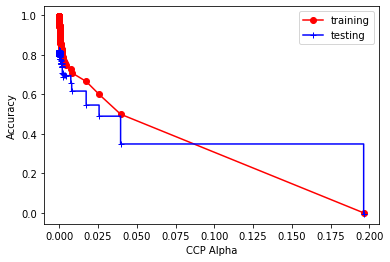

In [ ]:
train_score = [reg.score(x_train, y_train) for reg in alphalist]
test_score = [reg.score(x_test, y_test) for reg in alphalist]

plt.xlabel("CCP Alpha")
plt.ylabel("Accuracy")

plt.plot(ccp_alphas, train_score, marker = "o",
         label = "training", color="red")
plt.plot(ccp_alphas, test_score, marker = "+",
         label = "testing", color="blue", drawstyle="steps-post")
plt.legend()
plt.show()

Possible values of alpha seem to lie between:  0.000 - 0.025

[Text(0.5, 0.875, 'Ram <= 7.0\nsquared_error = 0.393\nsamples = 1106\nvalue = 10.822'),
 Text(0.25, 0.625, 'CPU_Name_Other Intel Proc. <= 0.5\nsquared_error = 0.193\nsamples = 373\nvalue = 10.201'),
 Text(0.125, 0.375, 'squared_error = 0.127\nsamples = 261\nvalue = 10.381'),
 Text(0.375, 0.375, 'squared_error = 0.094\nsamples = 112\nvalue = 9.779'),
 Text(0.75, 0.625, 'Ram <= 14.0\nsquared_error = 0.198\nsamples = 733\nvalue = 11.138'),
 Text(0.625, 0.375, 'TypeName_Notebook <= 0.5\nsquared_error = 0.147\nsamples = 533\nvalue = 10.988'),
 Text(0.5, 0.125, 'squared_error = 0.101\nsamples = 267\nvalue = 11.177'),
 Text(0.75, 0.125, 'squared_error = 0.122\nsamples = 266\nvalue = 10.798'),
 Text(0.875, 0.375, 'squared_error = 0.115\nsamples = 200\nvalue = 11.536')]

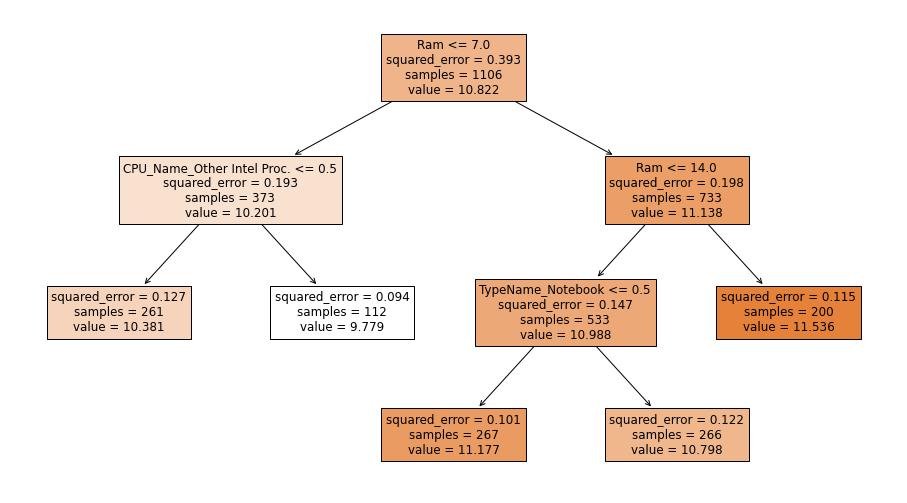

In [ ]:
reg = DecisionTreeRegressor(random_state=42, ccp_alpha = 0.0085)
reg.fit(x_train, y_train)
plt.figure(figsize=(16,9))
tree.plot_tree(reg, filled=True, feature_names=train.columns)

In [104]:
params=  {
    
    'RandomForest':{
        'model' : RandomForestRegressor(),
        'params':{
            'n_estimators':[int(x) for x in np.linspace(100,1200,10)],
            'criterion':["squared_error", "absolute_error"],
            'max_depth':[int(x) for x in np.linspace(1,30,5)],
            'max_features':['auto','sqrt','log2'],
            'ccp_alpha':[x for x in np.linspace(0.0025,0.0125,5)],
            'min_samples_split':[2,5,10,14],
            'min_samples_leaf':[2,5,10,14],
        }
    },
    'Decision Tree':{
        'model':DecisionTreeRegressor(),
        'params':{
            'criterion':["squared_error", "absolute_error"],
            'max_depth':[int(x) for x in np.linspace(1,30,5)],
            'max_features':['auto','sqrt','log2'],
            'ccp_alpha':[x for x in np.linspace(0.0025,0.0125,5)],
            'min_samples_split':[2,5,10,14],
            'min_samples_leaf':[2,5,10,14],
        }
    }
}

In [105]:
scores = []
for modelname,mp in params.items():
    clf = RandomizedSearchCV(mp['model'],
                            param_distributions=mp['params'], cv = 5,
                            n_iter = 10,scoring = 'neg_mean_squared_error', verbose=2)
    clf.fit(x_train, y_train)
    scores.append({
        'model_name':modelname,
        'best_score':clf.best_score_,
        'best_estimator':clf.best_estimator_,
    })

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ccp_alpha=0.0025, criterion=squared_error, max_depth=22, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=466; total time=   0.7s
[CV] END ccp_alpha=0.0025, criterion=squared_error, max_depth=22, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=466; total time=   0.7s
[CV] END ccp_alpha=0.0025, criterion=squared_error, max_depth=22, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=466; total time=   0.7s
[CV] END ccp_alpha=0.0025, criterion=squared_error, max_depth=22, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=466; total time=   0.7s
[CV] END ccp_alpha=0.0025, criterion=squared_error, max_depth=22, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=466; total time=   0.7s
[CV] END ccp_alpha=0.0025, criterion=squared_error, max_depth=15, max_features=auto, min_samples_leaf=14, min_samples_s

In [106]:
scores_df = pd.DataFrame(scores, columns=['model_name','best_score','best_estimator'])
scores_df

,model_name,best_score,best_estimator
0,RandomForest,-0.075756,"(DecisionTreeRegressor(ccp_alpha=0.0025, crite..."
1,Decision Tree,-0.108553,"DecisionTreeRegressor(ccp_alpha=0.0075, criter..."


In [107]:
scores

[{'best_estimator': RandomForestRegressor(ccp_alpha=0.0025, criterion='absolute_error',
                        max_depth=15, max_features='sqrt', min_samples_leaf=10,
                        min_samples_split=14, n_estimators=1077),
  'best_score': -0.0757560338825624,
  'model_name': 'RandomForest'},
 {'best_estimator': DecisionTreeRegressor(ccp_alpha=0.0075, criterion='absolute_error', max_depth=8,
                        max_features='auto', min_samples_leaf=2),
  'best_score': -0.10855289012770997,
  'model_name': 'Decision Tree'}]

In [108]:
rf = RandomForestRegressor(ccp_alpha=0.0025, criterion='absolute_error',
                        max_depth=15, max_features='sqrt', min_samples_leaf=10,
                        min_samples_split=14, n_estimators=1077)

rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
print(metrics.r2_score(y_test, y_pred))

0.7603880612503742


## Prediction on the whole Dataset

In [109]:
train

,Ram,Weight,TouchScreen,IPS,PPI,HDD,SSD,Company_Apple,Company_Asus,Company_Chuwi,...,TypeName_Ultrabook,TypeName_Workstation,OpSys_Other,OpSys_Windows,CPU_Name_Intel Core i3,CPU_Name_Intel Core i5,CPU_Name_Intel Core i7,CPU_Name_Other Intel Proc.,Gpu Brand_Intel,Gpu Brand_Nvidia
0,8,1.37,0,1,226.983005,0,128,1,0,0,...,1,0,0,0,0,1,0,0,1,0
1,8,1.34,0,0,127.677940,0,0,1,0,0,...,1,0,0,0,0,1,0,0,1,0
2,8,1.86,0,0,141.211998,0,256,0,0,0,...,0,0,1,0,0,1,0,0,1,0
3,16,1.83,0,1,220.534624,0,512,1,0,0,...,1,0,0,0,0,0,1,0,0,0
4,8,1.37,0,1,226.983005,0,256,1,0,0,...,1,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,4,1.80,1,1,157.350512,0,128,0,0,0,...,0,0,0,1,0,0,1,0,1,0
1299,16,1.30,1,1,276.053530,0,512,0,0,0,...,0,0,0,1,0,0,1,0,1,0
1300,2,1.50,0,0,111.935204,0,0,0,0,0,...,0,0,0,1,0,0,0,1,1,0
1301,6,2.19,0,0,100.454670,1000,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0


In [110]:
x_test

,Ram,Weight,TouchScreen,IPS,PPI,HDD,SSD,Company_Apple,Company_Asus,Company_Chuwi,...,TypeName_Ultrabook,TypeName_Workstation,OpSys_Other,OpSys_Windows,CPU_Name_Intel Core i3,CPU_Name_Intel Core i5,CPU_Name_Intel Core i7,CPU_Name_Other Intel Proc.,Gpu Brand_Intel,Gpu Brand_Nvidia
478,8,2.20,0,0,141.211998,1000,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
724,8,2.70,0,0,127.335675,1000,128,0,0,0,...,0,0,0,1,0,0,1,0,0,1
312,16,2.80,0,1,141.211998,1000,256,0,0,0,...,0,0,0,1,0,0,1,0,0,1
851,16,2.10,0,0,141.211998,1000,128,0,1,0,...,0,0,0,1,0,0,1,0,0,1
1276,6,2.30,0,0,100.454670,1000,0,0,0,0,...,0,0,0,1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506,8,2.00,0,0,141.211998,1000,256,0,1,0,...,0,0,0,1,0,0,1,0,1,0
168,8,3.00,0,1,127.335675,0,256,0,0,0,...,0,0,0,1,0,1,0,0,0,1
1170,8,1.96,0,0,141.211998,0,256,0,0,0,...,0,0,0,1,0,0,1,0,1,0
862,4,1.05,0,0,165.632118,0,128,0,0,0,...,0,0,0,1,0,1,0,0,1,0


In [ ]:
predicted = []
test_train = np.array(train)
for i in range(len(test_train)):
  predicted.append(rf.predict([test_train[i]]))

predicted

In [112]:
print(predicted)

[array([11.14664455]), array([10.9575135]), array([10.71977137]), array([11.44608274]), array([11.21521397]), array([10.1801622]), array([11.18092862]), array([10.9575135]), array([11.45280004]), array([11.08472334]), array([10.21854094]), array([10.1440929]), array([11.40468187]), array([10.35357854]), array([11.06800811]), array([11.21521397]), array([10.92858399]), array([11.44608274]), array([10.46656684]), array([11.11626508]), array([9.85561492]), array([10.96703745]), array([10.08835857]), array([11.06898691]), array([11.2218435]), array([10.18464013]), array([10.9575135]), array([10.84553805]), array([11.2745068]), array([10.71606164]), array([9.89785156]), array([10.16074084]), array([10.3199727]), array([11.49235802]), array([10.9575135]), array([9.79905609]), array([10.06237339]), array([10.82184494]), array([10.39246432]), array([10.86368427]), array([10.12740635]), array([11.39851259]), array([10.45033785]), array([10.59994589]), array([10.87119985]), array([11.21521397]),

In [113]:
# as I have transformed the price to np.log
# i havee to re transform it from np.log to np.exp in order to get the result
ans = [np.exp(predicted[i][0]) for i in range(len(predicted))]

In [114]:
data["Predicted"] = np.array(ans)
data

,Company,TypeName,Ram,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_Name,HDD,SSD,Gpu Brand,Predicted
0,Apple,Ultrabook,8,Mac,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,69330.801342
1,Apple,Ultrabook,8,Mac,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,57383.581453
2,HP,Notebook,8,Other,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,45241.557901
3,Apple,Ultrabook,16,Mac,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,93534.229187
4,Apple,Ultrabook,8,Mac,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,74251.553074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,Windows,1.80,33992.6400,1,1,157.350512,Intel Core i7,0,128,Intel,48395.059638
1299,Lenovo,2 in 1 Convertible,16,Windows,1.30,79866.7200,1,1,276.053530,Intel Core i7,0,512,Intel,98139.768115
1300,Lenovo,Notebook,2,Windows,1.50,12201.1200,0,0,111.935204,Other Intel Proc.,0,0,Intel,17898.968685
1301,HP,Notebook,6,Windows,2.19,40705.9200,0,0,100.454670,Intel Core i7,1000,0,AMD,33921.817173


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


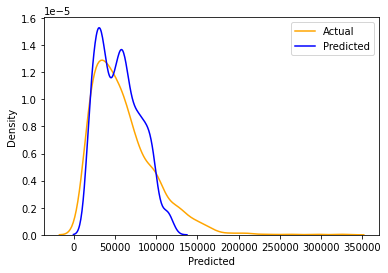

In [116]:
sns.distplot(data["Price"], hist=False, color="orange", label="Actual")
sns.distplot(data["Predicted"], hist=False, color="blue", label="Predicted")
plt.legend()
plt.show()

Not a very good prediction!

## Random Forest V2

In [118]:
rf1 = RandomForestRegressor(n_estimators=1200,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

rf1.fit(x_train, y_train)
print(f'R2 score : {metrics.r2_score(y_test, rf1.predict(x_test))}')

R2 score : 0.8546993909857287


In [ ]:
predicted = []
test_train = np.array(train)
for i in range(len(test_train)):
    predicted.append(rf1.predict([test_train[i]]))

In [120]:
print(predicted)

[array([11.18216071]), array([10.91832933]), array([10.57023602]), array([11.80819467]), array([11.32143112]), array([9.96106521]), array([11.39606184]), array([10.91832933]), array([11.40290753]), array([10.76981201]), array([10.09635674]), array([9.90105958]), array([11.74765172]), array([10.25017247]), array([11.16516999]), array([11.32143112]), array([10.72880577]), array([11.80819467]), array([10.33256113]), array([11.02254686]), array([9.38383501]), array([10.93025232]), array([9.75283081]), array([10.85193237]), array([10.99316355]), array([10.1184872]), array([10.92939925]), array([10.6778882]), array([11.15909205]), array([10.78758405]), array([9.61733317]), array([10.12257593]), array([10.19152157]), array([11.65102806]), array([10.92939925]), array([9.62331383]), array([9.93551959]), array([10.86718311]), array([10.33466955]), array([10.78238781]), array([9.98720854]), array([11.29858037]), array([10.36232447]), array([10.54546326]), array([10.88687109]), array([11.32143112]

In [122]:
ans = [np.exp(predicted[i][0]) for i in range(len(predicted))]

In [123]:
data1 = data.copy()
data1["Predicted Price"] = np.array(ans)
data1

,Company,TypeName,Ram,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_Name,HDD,SSD,Gpu Brand,Predicted,Predicted Price
0,Apple,Ultrabook,8,Mac,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,69330.801342,71837.414354
1,Apple,Ultrabook,8,Mac,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,57383.581453,55178.536772
2,HP,Notebook,8,Other,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,45241.557901,38957.867296
3,Apple,Ultrabook,16,Mac,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,93534.229187,134348.798507
4,Apple,Ultrabook,8,Mac,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,74251.553074,82572.429471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,Windows,1.80,33992.6400,1,1,157.350512,Intel Core i7,0,128,Intel,48395.059638,35710.855366
1299,Lenovo,2 in 1 Convertible,16,Windows,1.30,79866.7200,1,1,276.053530,Intel Core i7,0,512,Intel,98139.768115,85965.173928
1300,Lenovo,Notebook,2,Windows,1.50,12201.1200,0,0,111.935204,Other Intel Proc.,0,0,Intel,17898.968685,13522.655303
1301,HP,Notebook,6,Windows,2.19,40705.9200,0,0,100.454670,Intel Core i7,1000,0,AMD,33921.817173,39172.997925


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


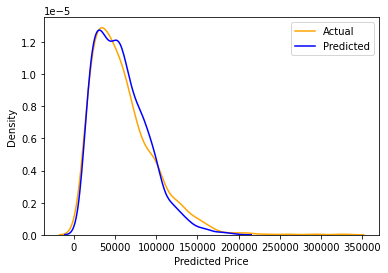

In [124]:
sns.distplot(data1["Price"], hist=False, color="orange", label="Actual")
sns.distplot(data1["Predicted Price"], hist=False, color="blue", label="Predicted")
plt.legend()
plt.show()

This is a much better prediction! 

In [125]:
import pickle
file = open('laptop_price_predictor_final.pkl','wb')
pickle.dump(rf1,file)
file.close()